In [1]:
from scipy import signal
import numpy as np
import pandas as pd
import tqdm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
def _read_data(data_file, N=np.inf):
    data = []
    with open(data_file, 'r') as f:
        count = 0
        for line in f:
            line = line.strip()
            num = list(map(float, line.split()))
            data.append(num)
            count += 1
            if count >= N:
                break
    return data

def compute_freqs_powers(data):
    freqs, powers = [], []
    for i in tqdm.tqdm(range(len(data))):
        f, p = signal.periodogram(data[i])
        freqs.append(f)
        powers.append(p)
    return freqs, powers


def fp_pipeline(data_file, N=np.inf) -> pd.DataFrame:
    data_list = _read_data(data_file) # Read all data
    data_arr = np.concatenate([np.asarray(d) for d in data_list])
    mean_data = np.mean(data_arr)
    sd_data = np.std(data_arr)

    if N < np.inf:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list[:N]]
    else:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list]
    freqs, powers = compute_freqs_powers(data_norm)
    df = pd.DataFrame.from_dict({
        'freq': np.concatenate(freqs),
        'power': np.concatenate(powers)
    })
    return df

In [10]:
# Estimate the mean and SD of each dataset
data_webtext = _read_data('/home/james/Workspace/gpt-2-output-dataset/data/webtext.None.model=.nll', N=5000)
data_webtext = np.concatenate([np.asarray(d) for d in data_webtext])
mean_webtext = np.mean(data_webtext)
sd_webtext = np.std(data_webtext)
print(mean_webtext, sd_webtext)

4.12973826874563 3.3534939835704556


In [17]:
data_small = _read_data('data/small-117M.train.nll', N=5000)
data_small = np.concatenate([np.asarray(d) for d in data_small])
mean_small = np.mean(data_small)
sd_small = np.std(data_small)
print(mean_small, sd_small)

data_small_k40 = _read_data('data/small-117M-k40.test.nll', N=5000)
data_small_k40 = np.concatenate([np.asarray(d) for d in data_small_k40])
mean_small_k40 = np.mean(data_small_k40)
sd_small_k40 = np.std(data_small_k40)
print(mean_small_k40, sd_small_k40)

4.477515675803005 3.399423175561336


2.2086800749537354 1.7777792583069203


In [19]:
data_medium = _read_data('data/medium-345M.test.nll', N=5000)
data_medium = np.concatenate([np.asarray(d) for d in data_medium])
mean_medium = np.mean(data_medium)
sd_medium = np.std(data_medium)
print(mean_medium, sd_medium)

data_medium_k40 = _read_data('data/medium-345M-k40.test.nll', N=5000)
data_medium_k40 = np.concatenate([np.asarray(d) for d in data_medium_k40])
mean_medium_k40 = np.mean(data_medium_k40)
sd_medium_k40 = np.std(data_medium_k40)
print(mean_medium_k40, sd_medium_k40)

4.813325519858933 3.5298565335424255
2.2257274940251675 1.766350909984826


In [20]:
data_large = _read_data('data/large-762M.test.nll', N=5000)
data_large = np.concatenate([np.asarray(d) for d in data_large])
mean_large = np.mean(data_large)
sd_large = np.std(data_large)
print(mean_large, sd_large)

data_large_k40 = _read_data('data/large-762M-k40.test.nll', N=5000)
data_large_k40 = np.concatenate([np.asarray(d) for d in data_large_k40])
mean_large_k40 = np.mean(data_large_k40)
sd_large_k40 = np.std(data_large_k40)
print(mean_large_k40, sd_large_k40)

3.5615737187259917 3.210019058419503
1.9575023980274346 1.7450819405645992


In [28]:
data_xl = _read_data('data/xl-1542M.test.nll', N=5000)
data_xl = np.concatenate([np.asarray(d) for d in data_xl])
mean_xl = np.mean(data_xl)
sd_xl = np.std(data_xl)
print(mean_xl, sd_xl)

data_xl_k40 = _read_data('data/xl-1542M-k40.test.nll', N=5000)
data_xl_k40 = np.concatenate([np.asarray(d) for d in data_xl_k40])
mean_xl_k40 = np.mean(data_xl_k40)
sd_xl_k40 = np.std(data_xl_k40)
print(mean_xl_k40, sd_xl_k40)

3.387414050549441 3.1719707991325974
1.901587205270579 1.7416425526819896


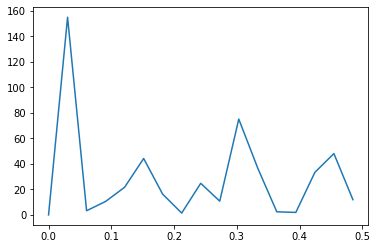

In [11]:
data = _read_data('/home/james/Workspace/gpt-2-output-dataset/data/webtext.None.model=.nll', N=1000)

f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

In [12]:
freqs, powers = compute_freqs_powers(data)
# print(list(map(len, freqs)))
# print(list(map(len, powers)))
print(type(freqs[0]))

100%|██████████| 1000/1000 [00:00<00:00, 16371.98it/s]

<class 'numpy.ndarray'>


In [13]:
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df

,freq,power
0,0.000000,1.264568e-29
1,0.030303,1.549970e+02
2,0.060606,3.288025e+00
3,0.090909,1.056313e+01
4,0.121212,2.170381e+01
...,...,...
16974,0.363636,1.549625e+01
16975,0.393939,1.436483e+01
16976,0.424242,2.144963e+01
16977,0.454545,2.506570e+01


In [14]:
df_np = df.to_numpy()
print(df_np.shape)
np.savetxt('/home/james/Workspace/gpt-2-output-dataset/plot/webtext.None.model=.nll.csv', df_np, delimiter=',')

(16979, 2)


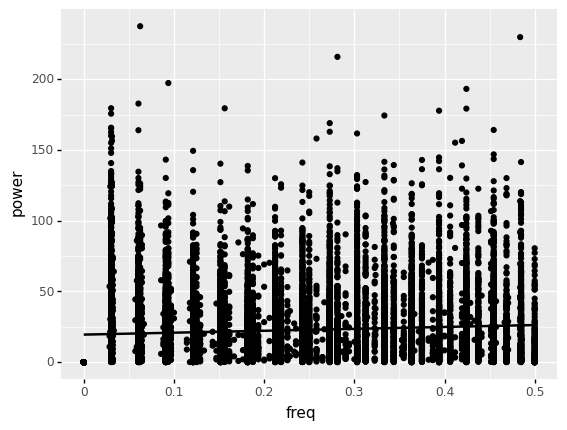

<ggplot: (8785853200105)>

In [15]:
(
    ggplot(df, aes(x='freq', y='power'))
    + geom_smooth() + geom_point()
)

In [31]:
# webtext
data = _read_data('data/webtext.train.nll', N=1000)
data = [(np.asarray(d) - mean_webtext)/sd_webtext for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/webtext_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22079.47it/s]


In [22]:
# Small-117M
data = _read_data('data/small-117M.train.nll', N=1000)
data = [(np.asarray(d) - mean_small)/sd_small for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/small-117M_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22005.56it/s]


In [23]:
# Small-117M-k40
data = _read_data('data/small-117M-k40.test.nll', N=1000)
data = [(np.asarray(d) - mean_small_k40)/sd_small_k40 for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/small-117M-k40_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22468.96it/s]


In [24]:
# Medium-345M
data = _read_data('data/medium-345M.test.nll', N=1000)
data = [(np.asarray(d) - mean_medium)/sd_medium for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/medium-345M_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22006.02it/s]


In [25]:
# Medium-345M-k40
data = _read_data('data/medium-345M-k40.test.nll', N=1000)
data = [(np.asarray(d) - mean_medium_k40)/sd_medium_k40 for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/medium-345M-k40_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 21445.46it/s]


In [26]:
# Large-762M
data = _read_data('data/large-762M.test.nll', N=1000)
data = [(np.asarray(d) - mean_large)/sd_large for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/large-762M_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22057.41it/s]


In [27]:
# large-762M-k40
data = _read_data('data/large-762M-k40.test.nll', N=1000)
data = [(np.asarray(d) - mean_large_k40)/sd_large_k40 for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/large-762M-k40_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 21607.09it/s]


In [29]:
# xl-1542M
data = _read_data('data/xl-1542M.test.nll', N=1000)
data = [(np.asarray(d) - mean_xl)/sd_xl for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/xl-1542M_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 22764.45it/s]


In [30]:
# xl-1542M
data = _read_data('data/xl-1542M-k40.test.nll', N=1000)
data = [(np.asarray(d) - mean_xl_k40)/sd_xl_k40 for d in data]
freqs, powers = compute_freqs_powers(data)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/xl-1542M-k40_freq_power_1k.csv', index=False)

100%|██████████| 1000/1000 [00:00<00:00, 20654.78it/s]


## Use fp_pipeline() to run experiments

In [16]:
# Estimated entropy in webtext.test, using 4 models: gpt2, gpt2-medium, -large, -xl
input_files = ['webtext.None.model=.nll']

for in_file in input_files:
    df = fp_pipeline('/home/james/Workspace/gpt-2-output-dataset/data/' + in_file)
    df.to_csv('/home/james/Workspace/gpt-2-output-dataset/plot/' + in_file[:-4] + '.webtext.None.model=.nll.csv', index=False)

100%|██████████| 5273/5273 [00:00<00:00, 15820.09it/s]


In [5]:
input_files = ['small-117M.test.model=gpt2.nll',
               'small-117M.test.model=gpt2-medium.nll',
               'small-117M.test.model=gpt2-large.nll',
               'small-117M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22824.58it/s]


In [6]:
input_files = ['small-117M-k40.test.model=gpt2.nll',
               'small-117M-k40.test.model=gpt2-medium.nll',
               'small-117M-k40.test.model=gpt2-large.nll',
               'small-117M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22975.29it/s]


In [7]:
input_files = ['medium-345M.test.model=gpt2.nll',
               'medium-345M.test.model=gpt2-medium.nll',
               'medium-345M.test.model=gpt2-large.nll',
               'medium-345M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 23238.33it/s]


In [9]:
input_files = ['medium-345M-k40.test.model=gpt2.nll',
               'medium-345M-k40.test.model=gpt2-medium.nll',
               'medium-345M-k40.test.model=gpt2-large.nll',
               'medium-345M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22268.24it/s]


In [10]:
input_files = ['large-762M.test.model=gpt2.nll',
               'large-762M.test.model=gpt2-medium.nll',
               'large-762M.test.model=gpt2-large.nll',
               'large-762M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 21683.50it/s]


In [11]:
input_files = ['large-762M-k40.test.model=gpt2.nll',
               'large-762M-k40.test.model=gpt2-medium.nll',
               'large-762M-k40.test.model=gpt2-large.nll',
               'large-762M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 21524.44it/s]


In [12]:
input_files = ['xl-1542M.test.model=gpt2.nll',
               'xl-1542M.test.model=gpt2-medium.nll',
               'xl-1542M.test.model=gpt2-large.nll',
               'xl-1542M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22636.43it/s]


In [13]:
input_files = ['xl-1542M-k40.test.model=gpt2.nll',
               'xl-1542M-k40.test.model=gpt2-medium.nll',
               'xl-1542M-k40.test.model=gpt2-large.nll',
               'xl-1542M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22583.05it/s]


In [6]:
# degen output data
input_files = [
    # 'unconditional_puresampling_large.model=gpt2.nll',
    # 'unconditional_sampling_t=0.9_large.model=gpt2.nll',
    # 'unconditional_topk_k=40_t=0.7_large.model=gpt2.nll',
    # 'unconditional_topk_k=640_large.model=gpt2.nll',
    # 'unconditional_topp_p=0.95_large.model=gpt2.nll',
    'unconditional_gold.model=gpt2.nll']

for in_file in input_files:
    df = fp_pipeline('data/data_degen/unconditional/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 6329.99it/s]
